# Install

In [1]:
!pip3 install ta -q

  Preparing metadata (setup.py) ... done


# Import

In [15]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

import ta
from sklearn.linear_model import LinearRegression

# Data

In [3]:
ultimo_ano = datetime.today() - timedelta(days=365)
df = yf.download('BTC-USD', start=ultimo_ano)

/tmp/ipython-input-3228758650.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('BTC-USD', start=ultimo_ano)
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2024-12-11,101173.031250,101913.359375,95747.226562,96656.062500,85391409936
2024-12-12,100043.000000,102524.914062,99339.953125,101167.804688,72073983533
2024-12-13,101459.257812,101888.804688,99233.281250,100046.648438,56894751583
2024-12-14,101372.968750,102618.882812,100634.054688,101451.437500,40422968793
2024-12-15,104298.695312,105047.539062,101227.031250,101373.531250,51145914137


In [5]:
df.shape

(366, 5)

# Trend

In [6]:
df_btc = df['Close'].copy()

In [17]:
df_btc

Ticker,BTC-USD
Date,
2024-12-11,101173.031250
2024-12-12,100043.000000
2024-12-13,101459.257812
2024-12-14,101372.968750
2024-12-15,104298.695312
...,...
2025-12-07,90405.640625
2025-12-08,90640.203125
2025-12-09,92691.710938


<Axes: xlabel='Date'>

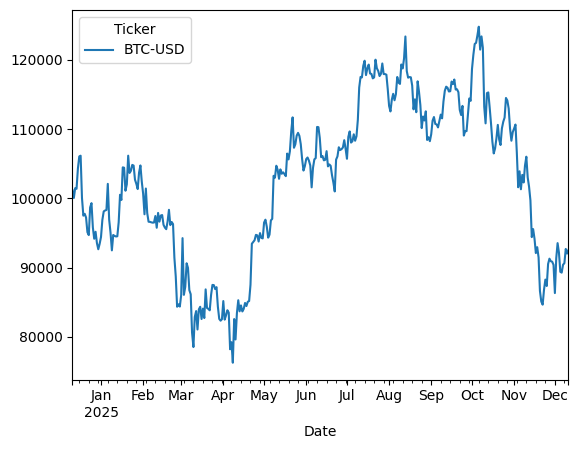

In [7]:
df_btc.plot()

In [8]:
lr = LinearRegression()

In [24]:
df_btc.iloc[-30:]

Ticker,BTC-USD
Date,
2025-11-12,101663.187500
2025-11-13,99697.492188
2025-11-14,94397.789062
2025-11-15,95549.148438
2025-11-16,94177.078125
2025-11-17,92093.875000
2025-11-18,92948.875000
2025-11-19,91465.992188
2025-11-20,86631.898438


In [25]:
x = np.array(range(df_btc.iloc[-30:].shape[0])).reshape(-1, 1)
y = df_btc.iloc[-30:].values

In [26]:
lr.fit(x, y)

LinearRegression()

In [27]:
y_pred = lr.predict(x)

<Axes: xlabel='Date'>

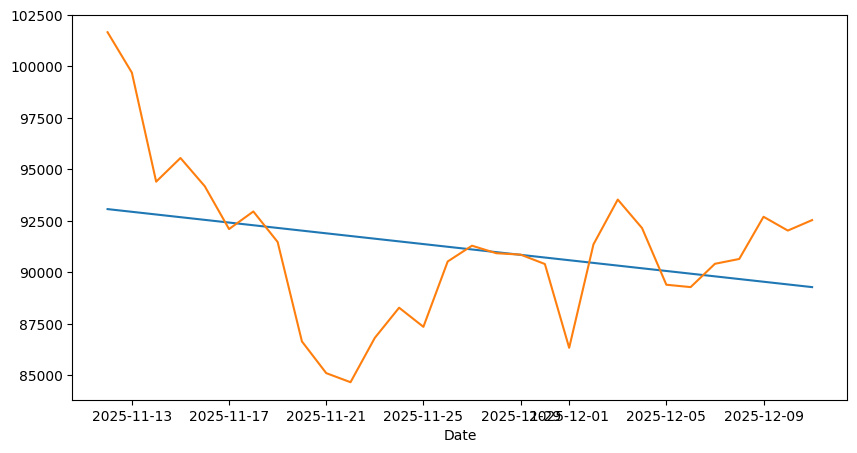

In [30]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_btc.iloc[-30:].index, y=y_pred.flatten())
sns.lineplot(x=df_btc.iloc[-30:].index, y=df_btc['BTC-USD'].iloc[-30:].values)

In [31]:
lr.coef_

array([[-130.76791748]])

# RSI

In [34]:
df_btc_rsi = ta.momentum.RSIIndicator(df_btc['BTC-USD'], window=7).rsi()

<Axes: xlabel='Date', ylabel='rsi'>

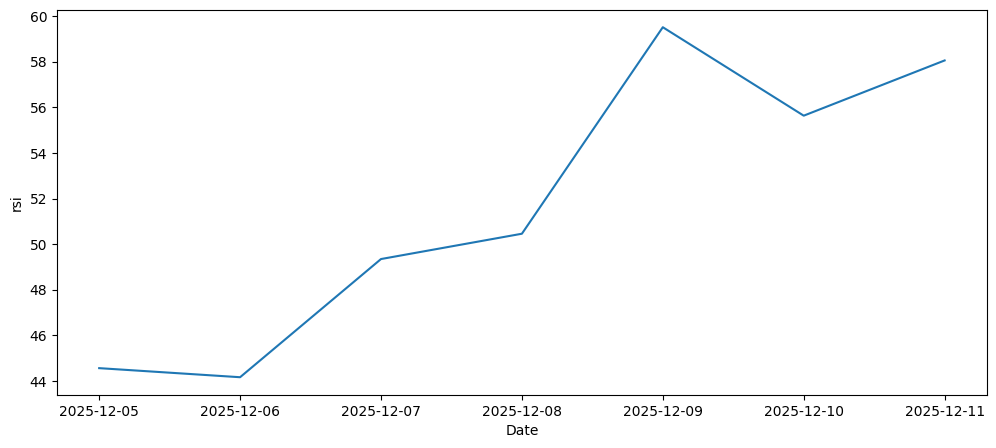

In [38]:
plt.figure(figsize=(12, 5))
sns.lineplot(df_btc_rsi.iloc[-7:])